# Employment DataBase

In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

In [2]:
def connect_to_db():
    connection = psycopg2.connect(user="postgres",
                                  password = ,
                                 host = "localhost",
                                 port = 5432,
                                 database = "employee_db")
    return connection
connection = connect_to_db()    

### Checking all the tables

In [3]:
department_name = pd.read_sql_query("select * from employees.department",connection)
department_name

,id,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [4]:
department_employee = pd.read_sql_query("select * from employees.department_employee",connection)
department_employee.head()

,employee_id,department_id,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [5]:
department_manager =  pd.read_sql_query("select * from employees.department_manager",connection)
department_manager.head()

,employee_id,department_id,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21


In [6]:
employee =  pd.read_sql_query("select * from employees.employee",connection)
employee.head()

,id,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [7]:
salary = pd.read_sql_query("select * from employees.salary",connection)
salary.head()

,employee_id,amount,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25
3,10001,66596,1989-06-25,1990-06-25
4,10001,66961,1990-06-25,1991-06-25


In [8]:
title = pd.read_sql_query("select * from employees.title",connection)
title.head()

,employee_id,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


### Find counts of each and every table

In [9]:
print(department_name.shape)
print(department_employee.shape)
print(department_manager.shape)
print(employee.shape)
print(salary.shape)
print(title.shape)

(9, 2)
(331603, 4)
(24, 4)
(300024, 6)
(1141783, 4)
(443308, 4)


###  Which department has the highest average salary of active employees ?

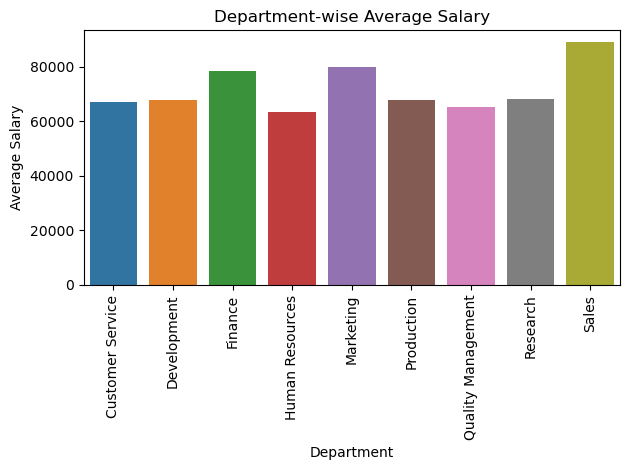

In [10]:
query = """select dept_name ,avg(amount)as avg_salary
                from employees.department_employee
                JOIN
                employees.salary ON employees.salary.employee_id = employees.department_employee.employee_id
                JOIN
                    employees.department ON employees.department.id = employees.department_employee.department_id
                where extract(year from salary.to_date) = 9999
                group by dept_name;"""

connection = connect_to_db()
average_salary_of_departments = pd.read_sql_query(query, connection) 
connection.close()  
    
sns.barplot(data = average_salary_of_departments,x = "dept_name",y = "avg_salary")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.title("Department-wise Average Salary")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

 Sales Department has the highest average salary then followed by Marketing and Finance

### Which title has the highest avg salary?

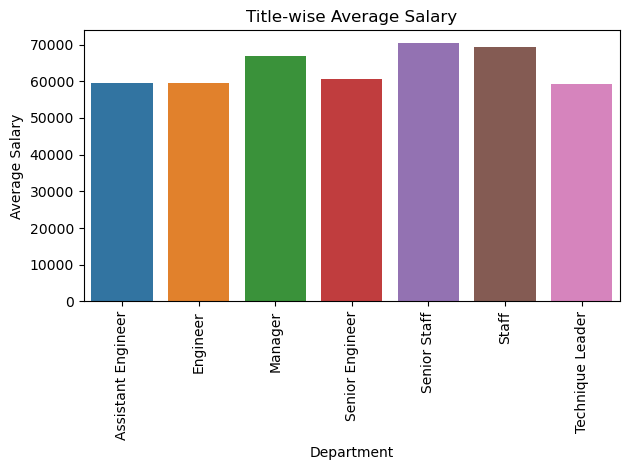

In [11]:
query = """select title ,avg(amount) AS avg_salary
            from employees.title
            inner join employees.salary  ON employees.title.employee_id = employees.salary.employee_id
            group by title;"""

connection = connect_to_db()
average_salary_of_titles = pd.read_sql_query(query,connection)
connection.close() 
    
sns.barplot(data = average_salary_of_titles,x = "title",y = "avg_salary")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.title("Title-wise Average Salary")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

Senior Staff has the highest average salary followed by staff then manager

### Distribution of salary across titles.

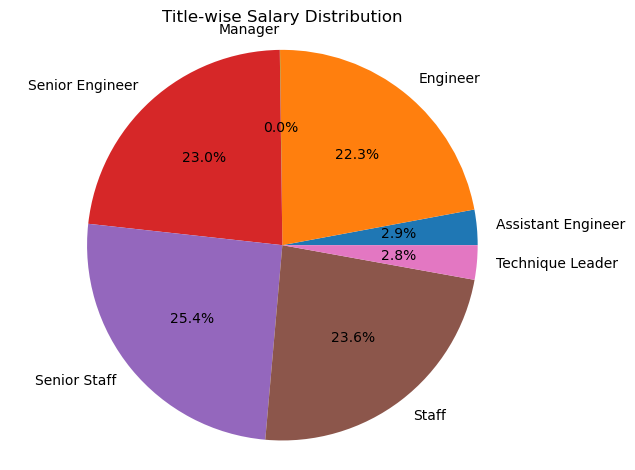

In [12]:
query = """select title, sum(amount) as amount from employees.title 
            inner join employees.salary 
            on employees.title.employee_id = employees.salary.employee_id
            group by title;"""

connection = connect_to_db()
distribution_of_salary_of_titles = pd.read_sql_query(query,connection)
connection.close()  

plt.pie(distribution_of_salary_of_titles['amount'], labels=distribution_of_salary_of_titles['title'], autopct='%1.1f%%')
plt.title("Title-wise Salary Distribution")
plt.axis('equal')  
plt.tight_layout()
plt.show()

### Distribution of salary across departments

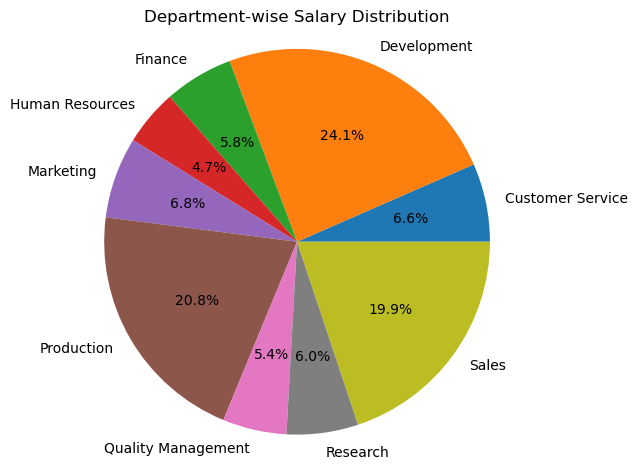

In [14]:
query = """select dept_name, sum(amount) as amount
            from employees.department_employee
            inner join employees.salary 
            on employees.department_employee.employee_id= employees.salary.employee_id
            inner join employees.department
            on employees.department.id = employees.department_employee.department_id
            group by dept_name;"""

connection = connect_to_db()
distribution_of_salary_of_departments = pd.read_sql_query(query,connection)
connection.close()  

plt.pie(distribution_of_salary_of_departments['amount'], labels=distribution_of_salary_of_departments['dept_name'], autopct='%1.1f%%')
plt.title("Department-wise Salary Distribution")
plt.axis('equal') 
plt.tight_layout()
plt.show()

###  How many active managers in each department. Is there any department with no manager?


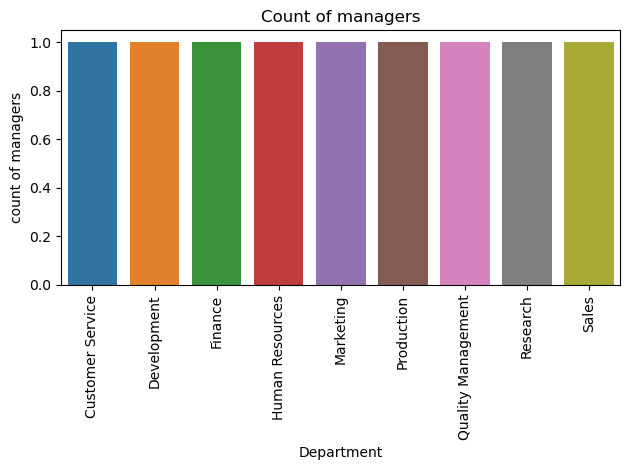

In [15]:
query = """select dept_name,count(employee_id) as count from employees.department_manager
            right join employees.department
            on employees.department_manager.department_id = employees.department.id
            where extract(year from department_manager.to_date) = 9999
            group by dept_name;"""

connection = connect_to_db()
active_managers_of_department = pd.read_sql_query(query,connection)
connection.close()  
    
sns.countplot(data = active_managers_of_department,x = "dept_name")
plt.xlabel("Department")
plt.ylabel("count of managers")
plt.title("Count of managers")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

For each department there is an active manager

### Composition of titles department-wise

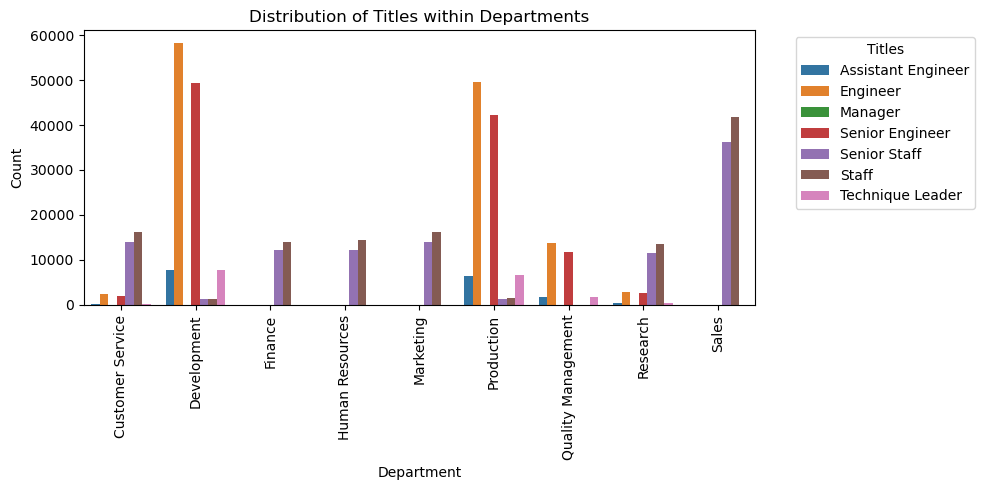

In [16]:
query = """
SELECT
    employees.department.dept_name as dept_name,
    employees.title.title as title,
    count(employees.employee.id) as count
FROM
    employees.employee
LEFT JOIN
    employees.title ON employees.title.employee_id = employees.employee.id
LEFT JOIN
    employees.department_employee ON employees.department_employee.employee_id = employees.employee.id
LEFT JOIN
    employees.department ON employees.department.id = employees.department_employee.department_id
GROUP BY
    employees.department.dept_name, employees.title.title
"""

connection = connect_to_db()
composition_of_title_dept_wise = pd.read_sql_query(query, connection)
connection.close()  

plt.figure(figsize=(10, 5))
sns.barplot(x='dept_name',y = "count", hue='title', data=composition_of_title_dept_wise)
plt.title('Distribution of Titles within Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Titles', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Composition of departments title-wise.

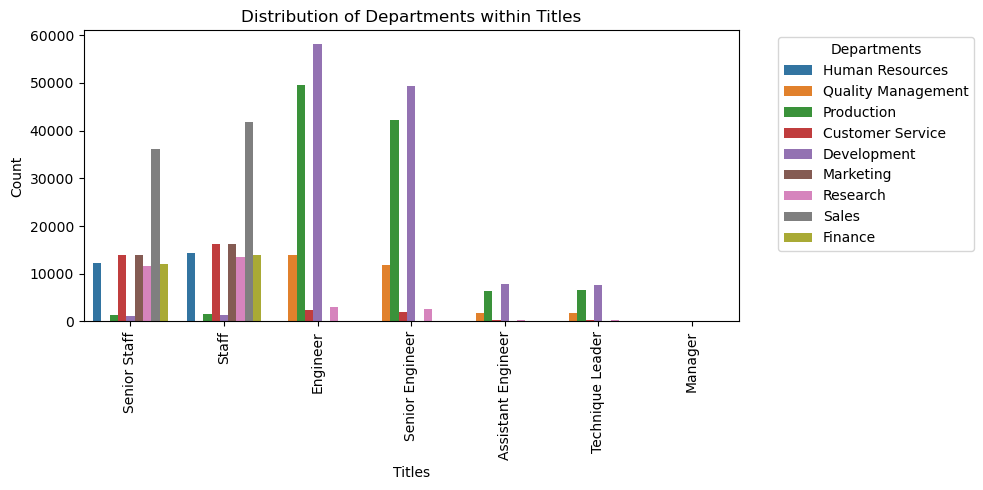

In [17]:
query = """
SELECT
    employees.title.title as title,
    employees.department.dept_name as dept_name
FROM
    employees.employee
LEFT JOIN
    employees.title ON employees.title.employee_id = employees.employee.id
LEFT JOIN
    employees.department_employee ON employees.department_employee.employee_id = employees.employee.id
LEFT JOIN
    employees.department ON employees.department.id = employees.department_employee.department_id
"""

connection = connect_to_db()
composition_of_dept_title_wise = pd.read_sql_query(query, connection)
connection.close()  

plt.figure(figsize=(10, 5))
sns.countplot(x='title', hue='dept_name', data=composition_of_dept_title_wise)
plt.title('Distribution of Departments within Titles')
plt.xlabel('Titles')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Departments', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Salaries of active department managers Which department's manager who is active earns the most?

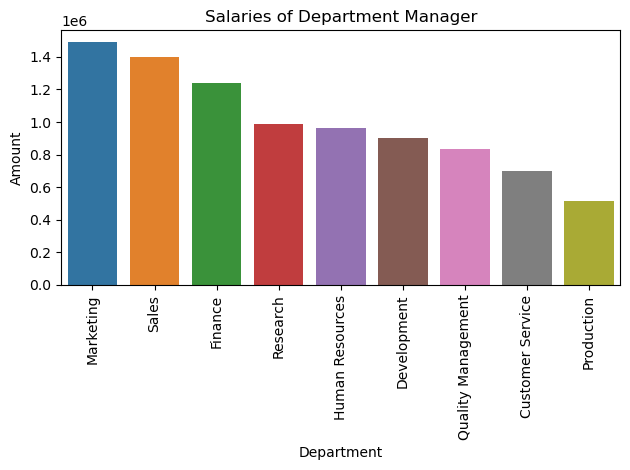

In [18]:
query = """SELECT dept_name , sum(amount) as amount
            from employees.department_manager
            inner join employees.salary on
            employees.department_manager.employee_id = employees.salary.employee_id
            inner join employees.department on
            employees.department.id = employees.department_manager.department_id
            where extract(year from department_manager.to_date) = 9999
            group by dept_name
            order by amount desc
                    """

connection = connect_to_db()
active_dept_manager = pd.read_sql_query(query,connection)
connection.close()  

sns.barplot(data = active_dept_manager,x = "dept_name",y = "amount")
plt.xlabel("Department")
plt.ylabel("Amount")
plt.title("Salaries of Department Manager")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In the marketing department the manager earns the most 

### What are the titles of active department managers? 

In [19]:
query = """select title from employees.title
            inner join employees.department_manager
            on 	employees.title.employee_id = employees.department_manager.employee_id 
            where extract(year from department_manager.to_date) = 9999;
                    """

connection = connect_to_db()
title_of_dept_manager = pd.read_sql_query(query,connection)
connection.close()  

title_of_dept_manager.head()

,title
0,Manager
1,Senior Staff
2,Manager
3,Senior Staff
4,Manager


### Past history of salaries of managers across department (yearly)

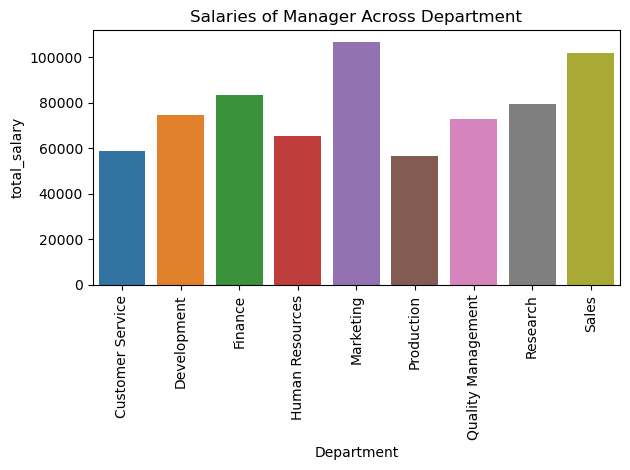

In [20]:
query = """SELECT 
            employees.department.dept_name,
            SUM(employees.salary.amount) AS total_salary
        FROM 
            employees.department_manager
        INNER JOIN 
            employees.salary ON employees.department_manager.employee_id = employees.salary.employee_id
        INNER JOIN 
            employees.department ON employees.department.id = employees.department_manager.department_id
        WHERE 
            EXTRACT(year FROM employees.department_manager.to_date) = 9999
            AND EXTRACT(year FROM employees.salary.to_date) = 9999
        GROUP BY 
            employees.department.dept_name
                    """

connection = connect_to_db()
salary_of_manager_across_dept = pd.read_sql_query(query,connection)
connection.close()  

sns.barplot(data = salary_of_manager_across_dept,x = "dept_name",y = "total_salary")
plt.xlabel("Department")
plt.ylabel("total_salary")
plt.title("Salaries of Manager Across Department")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

Marketing department has highest salary for manager 

### Distribution of salaries employees working for more than 10 years vs 4 years vs 1 year.

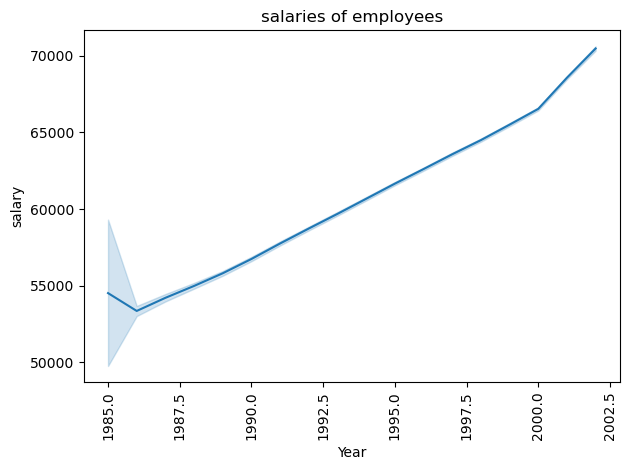

In [21]:
query = """select id, amount,
                EXTRACT(YEAR FROM employees.salary.to_date) AS year
                from  employees.employee 
                inner join employees.salary on
                employees.employee.id = employees.salary.employee_id
                where EXTRACT(year FROM employees.salary.to_date) != 9999
                    """

connection = connect_to_db()
salaries_of_employees = pd.read_sql_query(query,connection)
connection.close() 

sns.lineplot(data = salaries_of_employees, x = "year",y = "amount")
plt.xlabel("Year")
plt.ylabel("salary")
plt.title("salaries of employees")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### Average number of years employees work in the company before leaving (title wise)

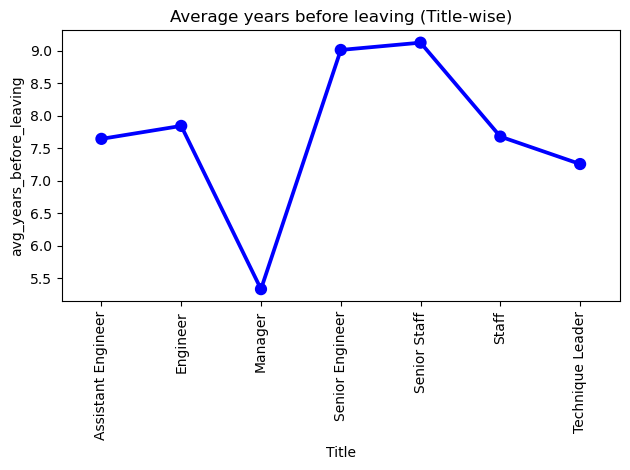

In [22]:
query = """SELECT
            employees.title.title,
            AVG(EXTRACT(YEAR FROM employees.title.to_date) - EXTRACT(YEAR FROM employees.employee.hire_date)) AS avg_years_before_leaving
        FROM
            employees.employee
        LEFT JOIN
            employees.title ON employees.title.employee_id = employees.employee.id
        WHERE
            date_part('year', employees.title.to_date) != 9999
        GROUP BY
            employees.title.title
    
                    """

connection = connect_to_db()
employees_work_year = pd.read_sql_query(query,connection)
connection.close()  

sns.pointplot(data =employees_work_year, x='title', y='avg_years_before_leaving', color='blue')
plt.xlabel("Title")
plt.ylabel("avg_years_before_leaving")
plt.title("Average years before leaving (Title-wise)")
plt.xticks(rotation=90) 
plt.tight_layout()  
plt.show()

### Average number of years employees work in the company before leaving (Dept wise)

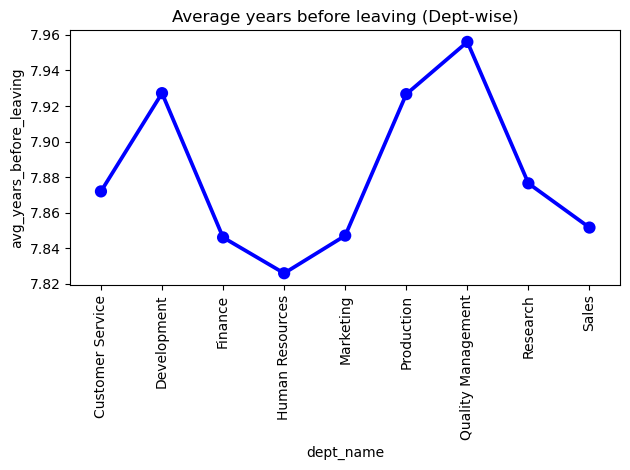

In [23]:
query = """SELECT
            employees.department.dept_name,
            AVG(EXTRACT(YEAR FROM employees.title.to_date) - EXTRACT(YEAR FROM employees.employee.hire_date)) AS avg_years_before_leaving
        FROM
            employees.employee
        LEFT JOIN
            employees.title ON employees.title.employee_id = employees.employee.id
        LEFT JOIN
            employees.department_employee ON employees.department_employee.employee_id = employees.employee.id
        LEFT JOIN
            employees.department ON employees.department.id = employees.department_employee.department_id
        WHERE
            date_part('year', employees.title.to_date) != 9999
        GROUP BY
            employees.department.dept_name;
    
                    """

connection = connect_to_db()
employees_work_year = pd.read_sql_query(query,connection)
connection.close() 

sns.pointplot(data =employees_work_year, x='dept_name', y='avg_years_before_leaving', color='blue')
plt.xlabel("dept_name")
plt.ylabel("avg_years_before_leaving")
plt.title("Average years before leaving (Dept-wise)")
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

### Median annual salary increment department wise

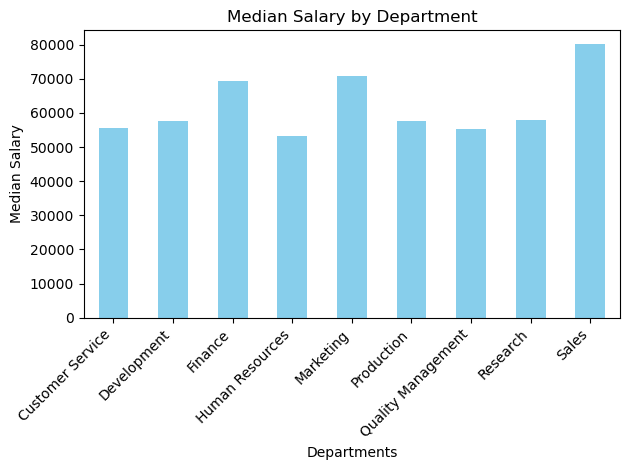

In [24]:
query = """SELECT
            dept_name as dept_name,
            salary.amount as salary
        FROM
            employees.department_employee
        JOIN
            employees.salary ON employees.department_employee.employee_id = employees.salary.employee_id
        JOIN
            employees.department ON employees.department_employee.department_id = employees.department.id
          """

connection = connect_to_db()
median_annual_salary = pd.read_sql_query(query,connection)
connection.close()  

median_salary = median_annual_salary.groupby("dept_name")["salary"].median()
median_salary.plot(kind = "bar",color='skyblue')
plt.title('Median Salary by Department')
plt.xlabel('Departments')
plt.ylabel('Median Salary')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

Sales has the highest median salary increment then followed by marketing and finance